# EXPLORATORY DATA ANALYSIS
 We are here going to explore the data to gain some useful insights into the same.


In [1]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:/0_1_Data Science and AI_Intellipaat/Assignments/000cap stone/Project/Walmart (1).csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**No null values to handle here**

In [5]:
data.duplicated().sum()

0

**No duplicates in the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


 **We note that date is an object column. change it to date time**

In [7]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [8]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


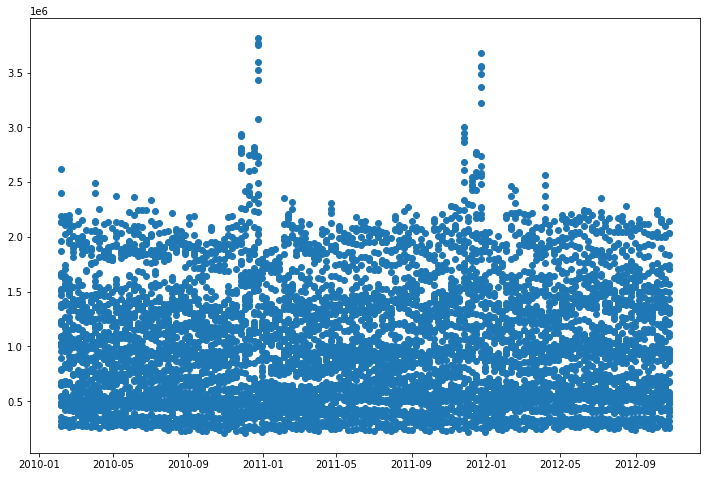

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Weekly_Sales'])

**We see that few weeks sales are really high may be due to festival and other reasons. So let us extract the information about the date, to day, month and year to get this info better.**

In [8]:
data['Day']=data['Date'].dt.weekday
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [11]:
data.drop('Date',axis=1)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [12]:
data['Day'].unique()

array([4], dtype=int64)

**Since all data are given on friday the only unique value in weekday column is 4. 
Hence we will drop it instead talk about which week of the month it is.**

In [13]:
data['Week']=data['Date'].dt.week
data.drop('Date',axis=1,inplace=True)
data.drop('Day',inplace=True,axis=1)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


In [14]:
data.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Month             12
Year               3
Week              52
dtype: int64

**Now let us visualize different relationship between the variables**

<Figure size 864x576 with 0 Axes>

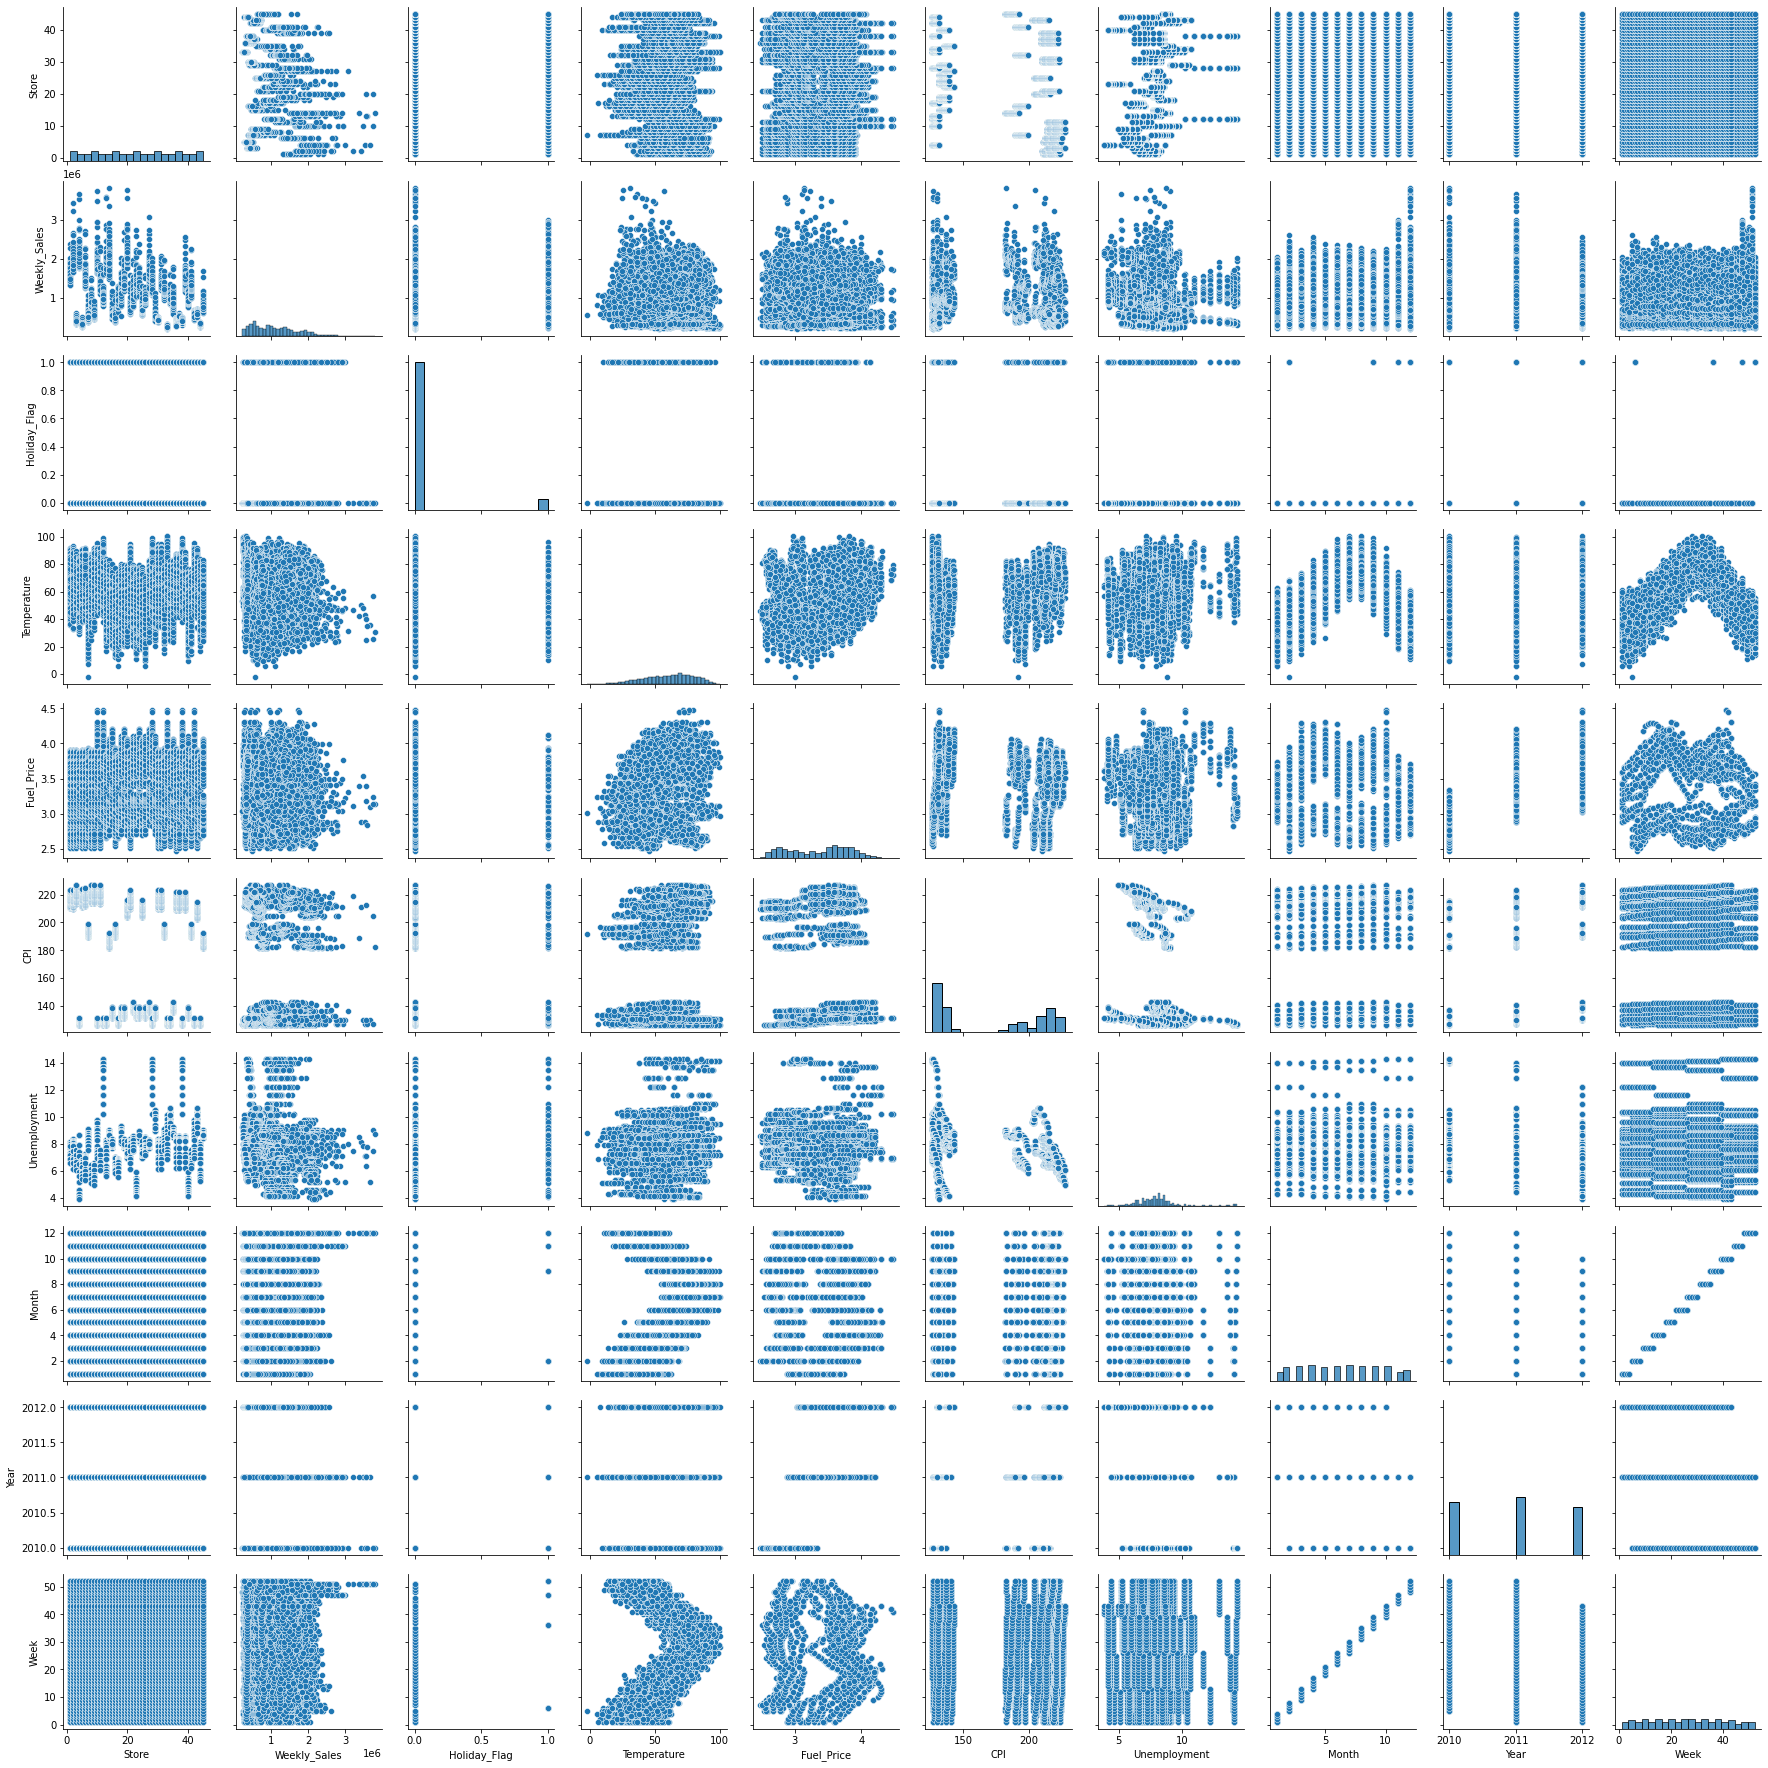

In [15]:
plt.figure(figsize=(12,8))
sns.pairplot(data)

**Some Observations:**

    1. Non holiday weeks have shown higher sales than holiday weeks for a few weeks
    
    2. Higher the unemployment rate, lower the sales
    
    3. Among all the months december generally shows the highest sale
    
    4. year on year the maximum sale amount has decreased.

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

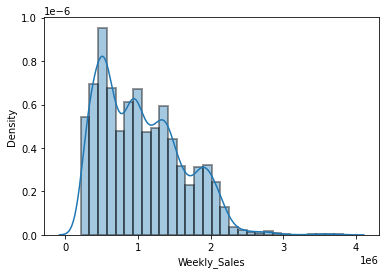

In [16]:
sns.distplot(data['Weekly_Sales'],kde=True,hist_kws=dict(edgecolor="black", linewidth=2), bins=30)

Text(0, 0.5, 'Sales_total')

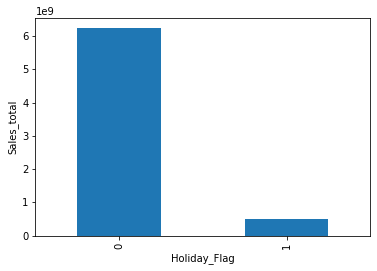

In [30]:
data.groupby('Holiday_Flag')['Weekly_Sales'].sum().plot(kind='bar')
plt.ylabel('Sales_total')

Text(0, 0.5, 'Sales_avg')

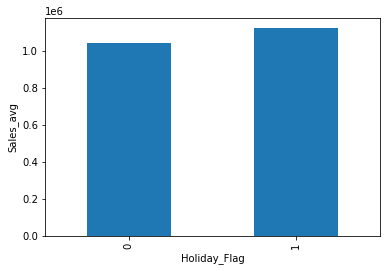

In [31]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot(kind='bar')
plt.ylabel('Sales_avg')

**Non - Holiday week has a high total sales than holiday weeks**

**Average sales though is high for holiday weeks**

Text(0, 0.5, 'Sales')

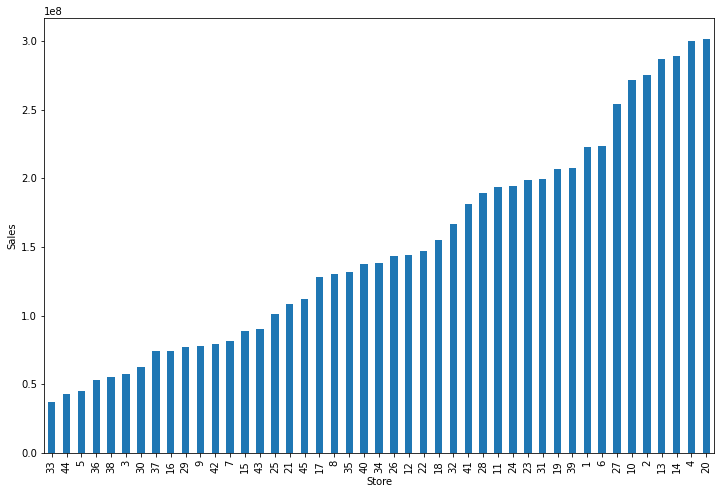

In [18]:
plt.figure(figsize=(12,8))
data.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind='bar')
plt.ylabel('Sales')


**Less than half the stored have a total sales more than 1.5e+08 (Maximum sum of sales being 3e+08)**

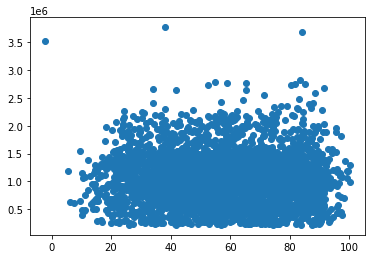

In [34]:
plt.scatter(data['Temperature'].unique(),data.groupby('Temperature')['Weekly_Sales'].mean())

**Weekly sales doesnt seem to have been impacted by temperature much**

<AxesSubplot:xlabel='Month'>

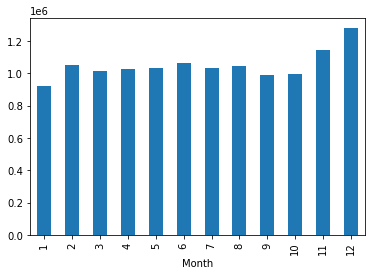

In [20]:
data.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar')

**Clearly average sales over years have been the same between february and october. November and December show higher sales may be due to Christmas**

<AxesSubplot:xlabel='Week'>

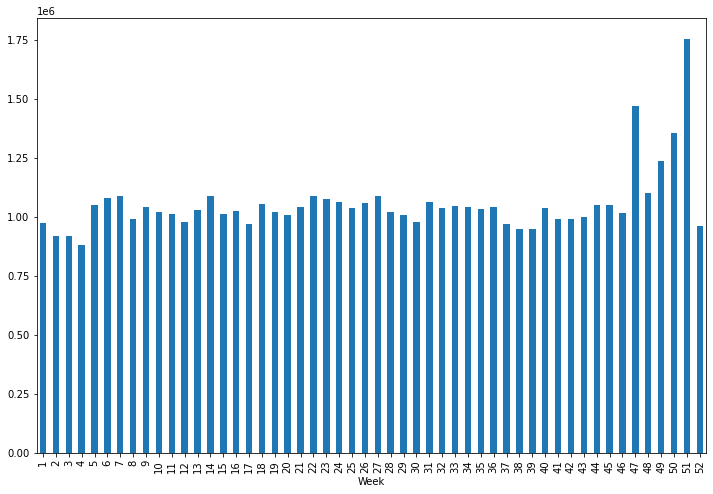

In [21]:
plt.figure(figsize=(12,8))
data.groupby('Week')['Weekly_Sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Year'>

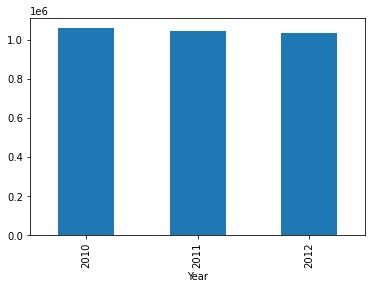

In [22]:
data.groupby('Year')['Weekly_Sales'].mean().plot(kind='bar')

**Almost the same sales in each year**

(3.3573, 14.834700000000002)

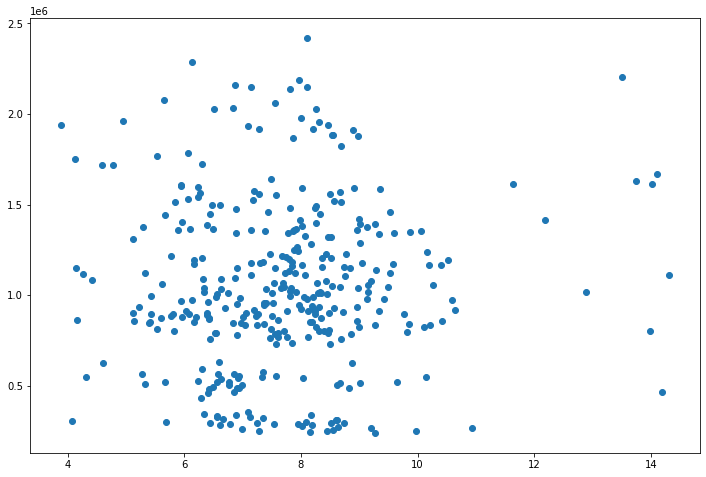

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(data['Unemployment'].unique(),data.groupby('Unemployment')['Weekly_Sales'].mean())
plt.xlim()

**As the unemployment rate has gone beyond 10, sales have reduced**

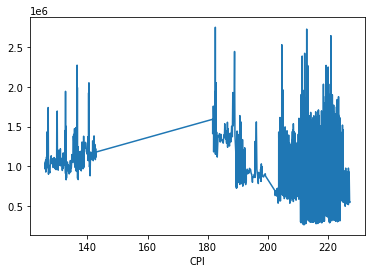

In [59]:
data.groupby('CPI')['Weekly_Sales'].mean().plot()
plt.show()

**High CPI indicates High sales**

**Discrete and continuous variables**

In [23]:
dis=[]
cont=[]
for i in range(0,data.shape[1]):
    if data.nunique()[i]>60:
        cont.append(data.nunique().index[i])
    else:
        dis.append(data.nunique().index[i])
print(f'Discrete variable : {dis}\nContinuous Variables : {cont}')

Discrete variable : ['Store', 'Holiday_Flag', 'Month', 'Year', 'Week']
Continuous Variables : ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


**Lets get the distribution of each continuous variable**

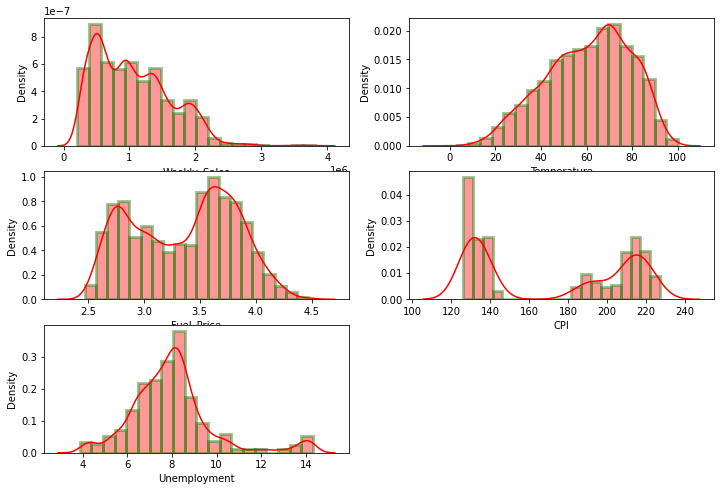

In [24]:
plt.figure(figsize=(12,8))
for i in range(0,5):
    plt.subplot(3,2,i+1)
    sns.distplot(data[cont[i]],bins=20,hist_kws=dict(edgecolor='green',linewidth=3),color='red')

**Continuous variables are not all normally distributed. highly skewed variables like cpi,fuelprice needs to be normalized**

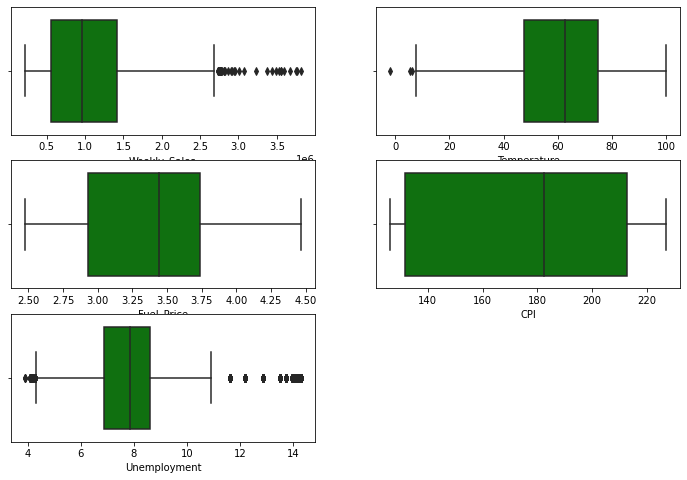

In [25]:
plt.figure(figsize=(12,8))
for i in range(0,5):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[cont[i]],color='green')

**Independent Variables unemployment and temperature have outliers which needs to be dealt with**

In [26]:
data.to_csv('data1.csv')

**Correlation**

In [27]:
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,2.910676e-15,3.474318e-12,3.106283e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,7.614332e-02,-1.837754e-02,7.421127e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,1.229958e-01,-5.678257e-02,1.277427e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.358618e-01,6.426923e-02,2.361833e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-4.215590e-02,7.794703e-01,-3.240300e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,4.979672e-03,7.479573e-02,6.041530e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-1.274559e-02,-2.418135e-01,-1.589158e-02
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.000000e+00,-1.944645e-01,9.959843e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.944645e-01,1.000000e+00,-1.819189e-01
Week,3.106283e-15,0.074211,1.277427e-01,0.236183,-0.032403,0.006042,-0.015892,9.959843e-01,-1.819189e-01,1.000000e+00


<AxesSubplot:>

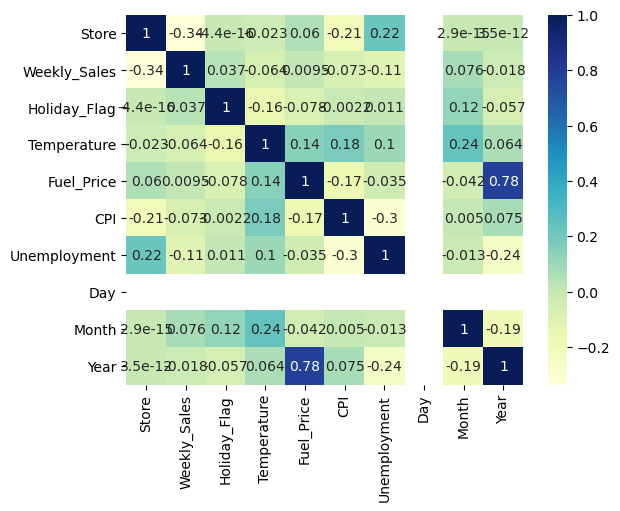

In [9]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

**We see that fuel price and year are correlated. So are month and week. Problem of multicollinearity**

<AxesSubplot:>

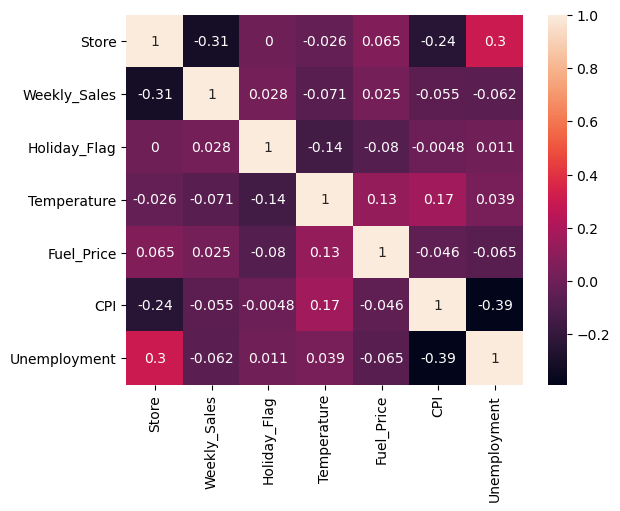

In [5]:
sns.heatmap(data.corr(method='spearman'),annot=True)